# ESTADÍSTICA DESCRIPTIVA CON PYTHON

## Importando librerías necesarias

In [1]:
# librerías de apoyo
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_boston
# librerías especializadas
from scipy import stats
import statsmodels.api as sm
#librerías de visualización
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Configuración de visualización de tablas de datos

In [2]:
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 300)

## Carga de datos

In [3]:
# Qué datos contiene el dataset "load_boston"
load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Obtención del Dataframe
df_boston = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=list(boston['feature_names']) + ['MEDV'])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df_boston.shape

(506, 14)

## Revisión general del dataset

In [7]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# Se convierte la variable 'CHAS' en tipo object, para facilitar la separación de los datos numéricos y categóricos.
df_boston['CHAS'] = (df_boston['CHAS'].astype('int')).astype('object')

In [9]:
df_boston['CHAS'].value_counts(), df_boston['CHAS'].dtype

(0    471
 1     35
 Name: CHAS, dtype: int64,
 dtype('O'))

**A partir de datos numéricos podemos obtener datos categóricos (de escala ordinal), haciendo uso de qcut():**
- Especificando el número de cuartiles (q), las etiquetas que se asignaran a cada categoría es opcional, retbins=True para saber el intervalo de cada categoria

In [10]:
out, bins = pd.qcut(df_boston['RAD'], q=3, labels=None, retbins=True)
bins, out

(array([ 1.,  4.,  7., 24.]),
 0      (0.999, 4.0]
 1      (0.999, 4.0]
 2      (0.999, 4.0]
 3      (0.999, 4.0]
 4      (0.999, 4.0]
            ...     
 501    (0.999, 4.0]
 502    (0.999, 4.0]
 503    (0.999, 4.0]
 504    (0.999, 4.0]
 505    (0.999, 4.0]
 Name: RAD, Length: 506, dtype: category
 Categories (3, interval[float64]): [(0.999, 4.0] < (4.0, 7.0] < (7.0, 24.0]])

In [11]:
df_boston['cat_RAD'] = out.astype('object')
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,cat_RAD
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,"(0.999, 4.0]"
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,"(0.999, 4.0]"
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,"(0.999, 4.0]"
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,"(0.999, 4.0]"
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,"(0.999, 4.0]"


In [12]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
 14  cat_RAD  506 non-null    object 
dtypes: float64(13), object(2)
memory usage: 59.4+ KB


Ahora se cuenta con 2 variables de tipo categóricas para analizar.

**Separación de variables categóricas y numéricas:**

In [13]:
var_categoricas = ['CHAS', 'cat_RAD']
var_numericas = df_boston.columns.drop(var_categoricas)
print(f'Variables categóricas: {var_categoricas}\n\nVariables numéricas: {var_numericas.values}')

Variables categóricas: ['CHAS', 'cat_RAD']

Variables numéricas: ['CRIM' 'ZN' 'INDUS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B'
 'LSTAT' 'MEDV']


## Resumen Estadístico de datos
### Utilizando Pandas

**Resumen estadístico para variables categóricas:**
- El resultado describe() varía según se aplique a una columna de datos numéricos o categóricos
- Para obtener resumen de las variables numéricas se utiliza el parámetro exclude='object'
- Describe por defecto calcula el count: número de registro (o muestra: n), media, desviación estándar, min, max, percentiles 25, 50 y 75 (Remember: P25=Mediana)
- Si se desea traer percentiles distintos a los que están por defecto se debe especificar como parámetro de describe()

In [14]:
df_boston.describe(percentiles=[.1, .25, .5, .75, .9], exclude='object')

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
10%,0.038195,0.000000,2.910000,0.427000,5.593500,26.950000,1.628300,3.000000,233.000000,14.750000,290.270000,4.680000,12.750000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
90%,10.753000,42.500000,19.580000,0.713000,7.151500,98.800000,6.816600,24.000000,666.000000,20.900000,396.900000,23.035000,34.800000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Resumen estadístico para variables categóricas:**

- La siguiente, es una tabla de resumen estadistico de las variables categóricas, para ello se especifica exclude='float' como parámetro.
- count: es el número de registro (o muestra: n)
- top: el valor categoria o valor modal
- freq: el número de veces que se repite la moda

In [15]:
df_boston.describe(exclude='float')

,CHAS,cat_RAD
count,506,506
unique,2,3
top,0,"(0.999, 4.0]"
freq,471,192


**Resumen de Estadistica descriptiva de variables seleccionadas, con medidas determinadas, utilizando agg():**
- Funciones: count, mean, median, mad, min, max, prod, sum, std, var, sem, skew, kurt
- Se pueden agregar las funciones entre comillas, directamente con el nombre o anteponiendo np.
- Para el calculo de la moda, no sirve esta manera.

In [16]:
df_boston[list(df_boston.columns[4:10])].agg({min, max, np.mean, np.median, 'std', 'skew'})

,NOX,RM,AGE,DIS,RAD,TAX
median,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000
skew,0.729308,0.403612,-0.598963,1.011781,1.004815,0.669956
std,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116
min,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000
mean,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154
max,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000


### Resumen utilizando stats de Scipy

**Del modo siguiente, se obtiene medidas de estadistica descriptiva, como:**
- Nro de observaciones, minimo, máximo, media, varianza, simetria y curtosis
- Y permite seleccionar los grados de libertad para el calculo de la varianza, y la corrección o no a partir del sesgo para la simetria y curtosis
- Con el prámetro nan_policy permite configurar la manipulación de valores faltantes.

In [17]:
descrip_stat = stats.describe(df_boston[var_numericas], ddof=1, bias=True)      # salida: n, (min, max), mean, varianza, skewness, kurtosis 
descrip_stat

DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 3.8500e-01, 3.5610e+00,
       2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02, 1.2600e+01,
       3.2000e-01, 1.7300e+00, 5.0000e+00]), array([ 88.9762, 100.    ,  27.74  ,   0.871 ,   8.78  , 100.    ,
        12.1265,  24.    , 711.    ,  22.    , 396.9   ,  37.97  ,
        50.    ])), mean=array([  3.61352356,  11.36363636,  11.13677866,   0.55469506,
         6.28463439,  68.57490119,   3.79504269,   9.54940711,
       408.23715415,  18.4555336 , 356.67403162,  12.65306324,
        22.53280632]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 1.34276357e-02,
       4.93670850e-01, 7.92358399e+02, 4.43401514e+00, 7.58163660e+01,
       2.84047595e+04, 4.68698912e+00, 8.33475226e+03, 5.09947595e+01,
       8.45867236e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  0.72714416,  0.40241467,
       -0.59718559,  1.00877876,  1.00183349,  0.66796827, -0.79994453,
       -2.8817983

Para mostrar los resultados en tabla se llevó a un dataframe:

In [18]:
data = {'nobs': descrip_stat.nobs, 'min': descrip_stat.minmax[0], 'max': descrip_stat.minmax[1], 'mean': descrip_stat.mean,
       'varianza': descrip_stat.variance, 'desv_estandar': np.sqrt(descrip_stat.variance), 'simetria': descrip_stat.skewness,
       'curtosis': descrip_stat.kurtosis, 'CV': np.sqrt(descrip_stat.variance)/descrip_stat.mean*100}
pd.DataFrame(data=data, index=var_numericas)

,nobs,min,max,mean,varianza,desv_estandar,simetria,curtosis,CV
CRIM,506,0.00632,88.9762,3.613524,73.986578,8.601545,5.207652,36.752786,238.037610
ZN,506,0.00000,100.0000,11.363636,543.936814,23.322453,2.219063,3.979949,205.237586
INDUS,506,0.46000,27.7400,11.136779,47.064442,6.860353,0.294146,-1.233218,61.600874
NOX,506,0.38500,0.8710,0.554695,0.013428,0.115878,0.727144,-0.075864,20.890339
RM,506,3.56100,8.7800,6.284634,0.493671,0.702617,0.402415,1.861027,11.179921
AGE,506,2.90000,100.0000,68.574901,792.358399,28.148861,-0.597186,-0.970014,41.048344
DIS,506,1.12960,12.1265,3.795043,4.434015,2.105710,1.008779,0.471299,55.485809
RAD,506,1.00000,24.0000,9.549407,75.816366,8.707259,1.001833,-0.870521,91.181152
TAX,506,187.00000,711.0000,408.237154,28404.759488,168.537116,0.667968,-1.142985,41.284120
PTRATIO,506,12.60000,22.0000,18.455534,4.686989,2.164946,-0.799945,-0.294116,11.730604


## Medidas de Resumen

### Medidas de Tendencia Central

#### **Media (aritmética)**

##### Media con Pandas

In [19]:
# Media de cada una de las variables del dataset
df_boston.mean(numeric_only=True)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

In [20]:
# Media de una característica específica
df_boston['MEDV'].mean()

22.532806324110677

In [21]:
# Medias por grupos de categorias
df_boston.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000


In [22]:
df_boston.groupby(var_categoricas).mean()

CRIM         ZN      INDUS       NOX        RM  \
CHAS cat_RAD                                                             
0    (0.999, 4.0]   0.264417  18.127072   8.813260  0.488658  6.300387   
     (4.0, 7.0]     0.484351  13.938776   8.428980  0.538386  6.367129   
     (7.0, 24.0]   11.500527   1.048951  16.473986  0.645566  6.122385   
1    (0.999, 4.0]   0.171723  22.727273   7.937273  0.465000  6.451273   
     (4.0, 7.0]     1.304961   1.818182  16.550909  0.671991  6.452727   
     (7.0, 24.0]    3.735765   0.000000  13.523077  0.635615  6.634000   

                         AGE       DIS        RAD         TAX    PTRATIO  \
CHAS cat_RAD                                                               
0    (0.999, 4.0]  57.349171  4.723071   3.220994  307.198895  18.591713   
     (4.0, 7.0]    63.017687  4.171876   5.408163  334.469388  17.088435   
     (7.0, 24.0]   86.311888  2.420350  21.874126  617.335664  19.924476   
1    (0.999, 4.0]  58.290909  4.291409   3.545455  253.727273  17.872727   
     (4.0, 7.0]    85.745455  2.454945   5.000000  351.363636  15.181818   
     (7.0, 24.0]   86.776923  2.448454  17.846154  527.923077  19.123077   

                            B      LSTAT       MEDV  
CHAS cat_RAD                                         
0    (0.999, 4.0]  385.390773  10.732707  23.385635  
     (4.0, 7.0]    376.226667  10.588912  24.900680  
     (7.0, 24.0]   296.231469  17.551049  17.573427  
1    (0.999, 4.0]  392.261818  12.014545  28.400000  
     (4.0, 7.0]    347.881818  11.341818  27.463636  
     (7.0, 24.0]   377.948462  10.503077  29.300000

##### Media con Numpy

In [23]:
# Media de cada una de las variables del dataset
medias_np = np.mean(np.array(df_boston.drop(columns=var_categoricas)), axis=0)
medias_np

array([  3.61352356,  11.36363636,  11.13677866,   0.55469506,
         6.28463439,  68.57490119,   3.79504269,   9.54940711,
       408.23715415,  18.4555336 , 356.67403162,  12.65306324,
        22.53280632])

In [24]:
pd.DataFrame(data=medias_np, index=var_numericas, columns=['media'])

,media
CRIM,3.613524
ZN,11.363636
INDUS,11.136779
NOX,0.554695
RM,6.284634
AGE,68.574901
DIS,3.795043
RAD,9.549407
TAX,408.237154
PTRATIO,18.455534


In [25]:
# Media de una característica específica
np.mean(np.array(df_boston['MEDV']))

22.532806324110677

##### Media con stats de Scipy
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html#scipy.stats.describe

In [26]:
# Media de cada una de las variables del dataset (Utilizando el resumen arriba mostrado)
pd.DataFrame(data=descrip_stat.mean, index=var_numericas, columns=['media'])

,media
CRIM,3.613524
ZN,11.363636
INDUS,11.136779
NOX,0.554695
RM,6.284634
AGE,68.574901
DIS,3.795043
RAD,9.549407
TAX,408.237154
PTRATIO,18.455534


In [27]:
# Media de una característica específica
var = 'MEDV'
est_descript_medv = stats.describe(df_boston[var])
print(f'La media de {var} es {float(est_descript_medv.mean)}')

La media de MEDV es 22.532806324110677


#### **Mediana**

##### Mediana con Pandas

In [28]:
# Mediana de cada una de las variables del dataset
df_boston.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64

In [29]:
# Mediana de una característica específica
df_boston['MEDV'].median()

21.2

##### Mediana con Numpy

In [30]:
# Mediana de cada una de las variables del dataset
medianas_np = np.median(np.array(df_boston[var_numericas]), axis=0)
pd.DataFrame(data=medianas_np, index=var_numericas, columns=['mediana'])

,mediana
CRIM,0.25651
ZN,0.00000
INDUS,9.69000
NOX,0.53800
RM,6.20850
AGE,77.50000
DIS,3.20745
RAD,5.00000
TAX,330.00000
PTRATIO,19.05000


In [31]:
# Mediana de una característica específica
np.median(np.array(df_boston['MEDV']))

21.2

#### **Moda**

##### Moda con Pandas

In [32]:
# Moda de cada una de las variables del dataset
df_boston.mode()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,cat_RAD
0,0.01501,0.0,18.1,0,0.538,5.713,100.0,3.4952,24.0,666.0,20.2,396.9,6.36,50.0,"(0.999, 4.0]"
1,14.33370,NaN,NaN,NaN,NaN,6.127,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,8.05,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,6.229,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,6.405,NaN,NaN,NaN,NaN,NaN,NaN,18.13,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,6.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Moda de una característica específica
df_boston['MEDV'].mode()

0    50.0
dtype: float64

##### Moda con Numpy
No existe manera directa

##### Moda con stats de Scipy

In [34]:
# Moda de cada una de las variables del dataset
# Con la desventaja que no muestra todas las modas presentes
modas = (stats.mode(df_boston))
modas

ModeResult(mode=array([[0.01501, 0.0, 18.1, 0, 0.538, 5.713, 100.0, 3.4952, 24.0, 666.0,
        20.2, 396.9, 6.36, 50.0, Interval(0.999, 4.0, closed='right')]],
      dtype=object), count=array([[  2, 372, 132, 471,  23,   3,  43,   5, 132, 132, 140, 121,   3,
         16, 192]]))

In [35]:
# Mostrado en tabla
pd.DataFrame(data=np.c_[modas.mode.ravel(),modas.count.ravel()], index=df_boston.columns, columns=['moda', 'frecuencia'])

,moda,frecuencia
CRIM,0.01501,2
ZN,0,372
INDUS,18.1,132
CHAS,0,471
NOX,0.538,23
RM,5.713,3
AGE,100,43
DIS,3.4952,5
RAD,24,132
TAX,666,132


In [36]:
# Moda de una característica específica
var = 'MEDV'
moda = stats.mode(df_boston[var])
print(f'La moda de {var} es {float(moda.mode)}, con frecuencia de {float(moda.count)}')

La moda de MEDV es 50.0, con frecuencia de 16.0


### Medidas de Posición

#### **Cuartiles y percentiles**

##### Usando Numpy

In [37]:
# Especificación de los cuartiles en probabilidad
p_cuartiles = np.arange(.25, 1, .25)   # O np.array([0.25, 0.5 , 0.75]) para especificar uno a uno
# Cálculo de los cuartiles
valores_cuartiles = np.quantile(df_boston[var_numericas], p_cuartiles, axis=0)
pd.DataFrame(data=valores_cuartiles, index=(p_cuartiles*100).astype(int), columns=var_numericas)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
25,0.082045,0.0,5.19,0.449,5.8855,45.025,2.100175,4.0,279.0,17.40,375.3775,6.950,17.025
50,0.256510,0.0,9.69,0.538,6.2085,77.500,3.207450,5.0,330.0,19.05,391.4400,11.360,21.200
75,3.677083,12.5,18.10,0.624,6.6235,94.075,5.188425,24.0,666.0,20.20,396.2250,16.955,25.000


In [38]:
# Especificación de los percentiles en porcentajes
p_percentiles = np.arange(20, 100, 20)   # O np.array([0.25, 0.5 , 0.75]) para especificar uno a uno
# Cálculo de los percentiles
valores_percentiles = np.percentile(df_boston[var_numericas], p_percentiles, axis=0)
pd.DataFrame(data=valores_percentiles, index=p_percentiles, columns=var_numericas)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
20,0.06417,0.0,4.39,0.442,5.837,37.8,1.9512,4.0,273.0,16.6,364.31,6.29,15.3
40,0.15038,0.0,7.38,0.507,6.086,65.4,2.6403,5.0,307.0,18.4,387.97,9.53,19.7
60,0.55007,0.0,12.83,0.575,6.376,85.9,3.8750,5.0,398.0,19.7,393.53,13.33,22.7
80,5.58107,20.0,18.10,0.668,6.750,95.6,5.6150,24.0,666.0,20.2,396.90,18.06,28.2


In [39]:
# Especificación de los cuartiles en probabilidad
p_cuartiles = np.arange(.25, 1, .25)   # O np.array([.25, .50, .75]) para especificar uno a uno
# Calculo de los cuartiles
valores_cuartiles = np.quantile(df_boston['CRIM'], p_cuartiles)
print(f'Cuartiles del Índice de Criminalidad:\nQ1={valores_cuartiles[0]}\nQ2={valores_cuartiles[1]}\nQ3={valores_cuartiles[2]}')

Cuartiles del Índice de Criminalidad:
Q1=0.08204499999999999
Q2=0.25651
Q3=3.6770825


In [40]:
# Especificación de los cuartiles en porcentajes
p_cuartiles = np.arange(25, 100, 25)   # O np.array([25, 50, 75]) para especificar uno a uno
# Calculo de los cuartiles
valores_cuartiles = np.percentile(df_boston['CRIM'], p_cuartiles)
print(f'Cuartiles del Índice de Criminalidad:\nQ1={valores_cuartiles[0]}\nQ2={valores_cuartiles[1]}\nQ3={valores_cuartiles[2]}')

Cuartiles del Índice de Criminalidad:
Q1=0.08204499999999999
Q2=0.25651
Q3=3.6770825


### Medidas de Dispersión

#### **Rango**

##### Rango con Pandas

In [41]:
# Rango de cada una de las variables del dataset
rangos = df_boston[var_numericas].max() - df_boston[var_numericas].min()
rangos

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
MEDV        45.00000
dtype: float64

In [42]:
# Rango de una característica específica
df_boston['MEDV'].max() - df_boston['MEDV'].min()

45.0

##### Rango con Numpy

In [43]:
# Rango de cada una de las variables del dataset
rangos_np = np.max(np.array(df_boston[var_numericas]), axis=0) - np.min(np.array(df_boston[var_numericas]), axis=0)
pd.DataFrame(data=rangos_np, index=var_numericas, columns=['rango'])

,rango
CRIM,88.96988
ZN,100.00000
INDUS,27.28000
NOX,0.48600
RM,5.21900
AGE,97.10000
DIS,10.99690
RAD,23.00000
TAX,524.00000
PTRATIO,9.40000


In [44]:
# Rango de una característica específica
np.max(np.array(df_boston['MEDV'])) - np.min(np.array(df_boston['MEDV']))

45.0

**Otra manera**
https://numpy.org/doc/stable/reference/generated/numpy.ptp.html?highlight=ptp#numpy.ptp

In [45]:
# Rango de cada una de las variables del dataset
rango_np2 = np.ptp(np.array(df_boston[var_numericas]), axis=0)
pd.DataFrame(data=rango_np2, index=var_numericas, columns=['moda'])

,moda
CRIM,88.96988
ZN,100.00000
INDUS,27.28000
NOX,0.48600
RM,5.21900
AGE,97.10000
DIS,10.99690
RAD,23.00000
TAX,524.00000
PTRATIO,9.40000


In [46]:
# Rango de una característica específica
np.ptp(np.array(df_boston['MEDV']))

45.0

#### **Varianza**

##### Varianza con Pandas

In [47]:
# Varianza de cada una de las variables del dataset
varianzas = df_boston[var_numericas].var()
varianzas

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
dtype: float64

In [48]:
# Varianza de una característica específica
df_boston['AGE'].var()

792.358398505068

##### Varianza con Numpy

In [49]:
# Varianza de cada una de las variables del dataset
varianzas_np = np.var(np.array(df_boston[var_numericas]), axis=0)
pd.DataFrame(data=varianzas_np, index=[var_numericas], columns=['varianza'])

,varianza
CRIM,73.840360
ZN,542.861840
INDUS,46.971430
NOX,0.013401
RM,0.492695
AGE,790.792473
DIS,4.425252
RAD,75.666531
TAX,28348.623600
PTRATIO,4.677726


In [50]:
# Varianza de una característica específica
np.var(np.array(df_boston['AGE']))

790.7924728163227

##### Varianza con stats de Scipy

In [51]:
# Varianza de cada una de las variables del dataset
pd.DataFrame(data=descrip_stat.variance, index=var_numericas, columns=['varianza'])

,varianza
CRIM,73.986578
ZN,543.936814
INDUS,47.064442
NOX,0.013428
RM,0.493671
AGE,792.358399
DIS,4.434015
RAD,75.816366
TAX,28404.759488
PTRATIO,4.686989


In [52]:
# Varianza de una característica específica
var = 'AGE'
est_descript_medv = stats.describe(df_boston[var])
print(f'La varianza de {var} es {float(est_descript_medv.variance)}')

La varianza de AGE es 792.358398505068


#### **Desviación estándar**

##### Desviación estándar con Pandas

In [53]:
# Desviación estándar de cada una de las variables del dataset
desv_ests = df_boston[var_numericas].std()    # ddof=1 por defecto
desv_ests

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

In [54]:
# Desviación estándar de una característica específica
df_boston['AGE'].std(ddof=1)

28.148861406903617

In [55]:
# Desviación estándar de una característica específica
df_boston['AGE'].std(ddof=0)

28.121032570236867

##### Desviación estándar con Numpy

In [56]:
# Desviación estándar de cada una de las variables del dataset
desv_ests_np = np.std(np.array(df_boston[var_numericas]), axis=0)
pd.DataFrame(data=desv_ests_np, index=var_numericas, columns=['desv_estandar'])

,desv_estandar
CRIM,8.593041
ZN,23.299396
INDUS,6.853571
NOX,0.115763
RM,0.701923
AGE,28.121033
DIS,2.103628
RAD,8.698651
TAX,168.370495
PTRATIO,2.162805


In [57]:
# Desviación estándar de una característica específica
np.std(np.array(df_boston['AGE']))

28.121032570236867

##### Desviación estándar con stats de Scipy

In [58]:
# Desviación estándar de cada una de las variables del dataset
pd.DataFrame(data=np.sqrt(descrip_stat.variance), index=var_numericas, columns=['desv_estandar'])

,desv_estandar
CRIM,8.601545
ZN,23.322453
INDUS,6.860353
NOX,0.115878
RM,0.702617
AGE,28.148861
DIS,2.105710
RAD,8.707259
TAX,168.537116
PTRATIO,2.164946


In [59]:
# Desviación estándar de una característica específica
var = 'AGE'
est_descript_medv = stats.describe(df_boston[var])
print(f'La desviación estándar de {var} es {float(math.sqrt(est_descript_medv.variance))}')   # válido math.sqrt o np.sqrt

La desviación estándar de AGE es 28.148861406903617


#### **Rango intercuartil**

##### Rango intercuartil con Pandas

In [60]:
# Rango intercuartil de cada una de las variables del dataset
rango_intercuartil = df_boston.quantile(0.75) - df_boston.quantile(0.25)
rango_intercuartil

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MEDV         7.975000
dtype: float64

In [61]:
# Rango intercuartil de una característica específica
df_boston['MEDV'].quantile(0.75) - df_boston['MEDV'].quantile(0.25)

7.975000000000001

##### Rango intercuartil con Numpy

In [62]:
# Rango intercuartil de cada una de las variables del dataset
rango_intercuartil_np = np.quantile(np.array(df_boston[var_numericas]), q=0.75, axis=0) - np.quantile(np.array(df_boston[var_numericas]), q=0.25, axis=0)
pd.DataFrame(data=rango_intercuartil_np, index=[var_numericas], columns=['rango_intercuartil'])

,rango_intercuartil
CRIM,3.595038
ZN,12.500000
INDUS,12.910000
NOX,0.175000
RM,0.738000
AGE,49.050000
DIS,3.088250
RAD,20.000000
TAX,387.000000
PTRATIO,2.800000


In [63]:
# Rango intercuartil de una característica específica
np.quantile(np.array(df_boston['MEDV']), q=0.75) - np.quantile(np.array(df_boston['MEDV']), q=0.25)

7.975000000000001

##### Rango intercuartil con stats de Scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html

In [64]:
# Rango intercuartil de cada una de las variables del dataset
pd.DataFrame(data=stats.iqr(df_boston[var_numericas], axis=0), index=[var_numericas], columns=['rango_intercuartil'])

,rango_intercuartil
CRIM,3.595038
ZN,12.500000
INDUS,12.910000
NOX,0.175000
RM,0.738000
AGE,49.050000
DIS,3.088250
RAD,20.000000
TAX,387.000000
PTRATIO,2.800000


In [65]:
# Rango intercuartil de una característica específica
var = 'AGE'
print(f'La rango_intercuartil de {var} es {float(stats.iqr(df_boston[var]))}')   # válido math.sqrt o np.sqrt

La rango_intercuartil de AGE es 49.04999999999999


#### **Coeficiente de variación**

##### Coeficiente de variación con Pandas

In [66]:
# Coeficiente de variación de cada una de las variables del dataset
CVs = df_boston[var_numericas].std()/df_boston[var_numericas].mean()*100
CVs

CRIM       238.037610
ZN         205.237586
INDUS       61.600874
NOX         20.890339
RM          11.179921
AGE         41.048344
DIS         55.485809
RAD         91.181152
TAX         41.284120
PTRATIO     11.730604
B           25.596162
LSTAT       56.437413
MEDV        40.816505
dtype: float64

In [67]:
# Coeficiente de variación de una característica específica
df_boston['MEDV'].std()/df_boston['MEDV'].mean()*100

40.81650529938067

##### Coeficiente de variación con Numpy

In [68]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,cat_RAD
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,"(0.999, 4.0]"
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,"(0.999, 4.0]"
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,"(0.999, 4.0]"
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,"(0.999, 4.0]"
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,"(0.999, 4.0]"


In [69]:
# Coeficiente de variación de cada una de las variables del dataset
cv_np = np.std(df_boston[var_numericas], axis=0)/np.mean(df_boston[var_numericas], axis=0)*100
pd.DataFrame(data=np.array(cv_np), index=[var_numericas], columns=['CV'])

,CV
CRIM,237.802278
ZN,205.034682
INDUS,61.539973
NOX,20.869686
RM,11.168868
AGE,41.007762
DIS,55.430954
RAD,91.091007
TAX,41.243305
PTRATIO,11.719007


In [70]:
# Coeficiente de variación de una característica específica
np.std(np.array(df_boston['MEDV']))/np.mean(np.array(df_boston['MEDV']))*100

40.77615283741554

##### Coeficiente de variación con stats de Scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.variation.html#scipy.stats.variation

In [71]:
cv_np2 = stats.variation(np.array(df_boston[var_numericas]), axis=0)*100
pd.DataFrame(data=cv_np2, index=var_numericas, columns=['cv'])

,cv
CRIM,237.802278
ZN,205.034682
INDUS,61.539973
NOX,20.869686
RM,11.168868
AGE,41.007762
DIS,55.430954
RAD,91.091007
TAX,41.243305
PTRATIO,11.719007


### Medidas de Forma

#### **Simetría**

##### Simetría con Pandas

In [72]:
# Simetría de cada una de las variables del dataset
simetrias = df_boston.skew()
simetrias

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [73]:
# Simetría de una característica específica
df_boston['MEDV'].skew()     # n-1

1.1080984082549072

##### Simetría con Numpy
No existe manera

##### Simetría con stats de Scipy

In [74]:
# Simetría de cada una de las variables del dataset
pd.DataFrame(data=descrip_stat.skewness, index=var_numericas, columns=['simetria'])

,simetria
CRIM,5.207652
ZN,2.219063
INDUS,0.294146
NOX,0.727144
RM,0.402415
AGE,-0.597186
DIS,1.008779
RAD,1.001833
TAX,0.667968
PTRATIO,-0.799945


In [75]:
# Simetría de una característica específica
var = 'AGE'
est_descript_medv = stats.describe(df_boston[var])
print(f'La simetría de {var} es {float(est_descript_medv.skewness)}')

La simetría de AGE es -0.5971855948016143


**Otra manera**

In [76]:
# Simetría de cada una de las variables del dataset
simetrias_ss = stats.skew(np.array(df_boston[var_numericas]), bias=True, axis=0)
pd.DataFrame(data=simetrias_ss, index=var_numericas, columns=['simetria'])

,simetria
CRIM,5.207652
ZN,2.219063
INDUS,0.294146
NOX,0.727144
RM,0.402415
AGE,-0.597186
DIS,1.008779
RAD,1.001833
TAX,0.667968
PTRATIO,-0.799945


In [77]:
# Simetría de una característica específica
stats.skew(np.array(df_boston['AGE']))

-0.5971855948016143

#### **Curtosis**

##### Curtosis con Pandas

In [78]:
# Curtosis de cada una de las variables del dataset
curtosis = df_boston.kurt()
curtosis

CRIM       37.130509
ZN          4.031510
INDUS      -1.233540
CHAS        9.638264
NOX        -0.064667
RM          1.891500
AGE        -0.967716
DIS         0.487941
RAD        -0.867232
TAX        -1.142408
PTRATIO    -0.285091
B           7.226818
LSTAT       0.493240
MEDV        1.495197
dtype: float64

In [79]:
# Curtosis de una característica específica
df_boston['AGE'].kurt()     # n-1

-0.9677155941626912

##### Curtosis con Numpy
No existe manera directa

##### Curtosis con stats de Scipy

In [80]:
# Curtosis de cada una de las variables del dataset
pd.DataFrame(data=descrip_stat.kurtosis, index=var_numericas, columns=['curtosis'])

,curtosis
CRIM,36.752786
ZN,3.979949
INDUS,-1.233218
NOX,-0.075864
RM,1.861027
AGE,-0.970014
DIS,0.471299
RAD,-0.870521
TAX,-1.142985
PTRATIO,-0.294116


In [81]:
# Curtosis de una característica específica
var = 'AGE'
est_descript_medv = stats.describe(df_boston[var])
print(f'La curtosis de {var} es {float(est_descript_medv.kurtosis)}')

La curtosis de AGE es -0.97001392664039


**Otra manera**

In [82]:
# Curtosis de cada una de las variables del dataset
curtosis_ss = stats.kurtosis(np.array(df_boston[var_numericas]), bias=True, axis=0)
pd.DataFrame(data=curtosis_ss, index=var_numericas, columns=['curtosis'])

,curtosis
CRIM,36.752786
ZN,3.979949
INDUS,-1.233218
NOX,-0.075864
RM,1.861027
AGE,-0.970014
DIS,0.471299
RAD,-0.870521
TAX,-1.142985
PTRATIO,-0.294116


In [83]:
# Curtosis de una característica específica
stats.kurtosis(np.array(df_boston['AGE']))

-0.97001392664039

## Organización de los datos

### Tablas de frecuencias
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html#scipy.stats.binned_statistic

#### Tabla de frecuencia: de variable categórica

In [84]:
df_boston['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [85]:
df_boston[['CHAS', 'cat_RAD']].groupby('CHAS').count()

,cat_RAD
CHAS,
0,471
1,35


In [86]:
cat_f_abs = df_boston['CHAS'].value_counts()
table = {'categoria': np.array(['no', 'si']),'f_abs': cat_f_abs.values, 'f_abs_acum': np.cumsum(cat_f_abs.values),
       'f_rel': cat_f_abs.values/sum(cat_f_abs.values), 'f_rel_acum': np.cumsum(cat_f_abs.values/sum(cat_f_abs.values))}
print('Tabla de frecuencias de la cercanía al Charles River')
pd.DataFrame(data=table).set_index('categoria')

Tabla de frecuencias de la cercanía al Charles River


,f_abs,f_abs_acum,f_rel,f_rel_acum
categoria,,,,
no,471,471,0.93083,0.93083
si,35,506,0.06917,1.00000


In [87]:
rad_f_abs = df_boston['cat_RAD'].value_counts()
table = {'categoria': rad_f_abs.index, 'f_abs': rad_f_abs.values, 
         'f_abs_acum': np.cumsum(rad_f_abs.values), 'f_rel': rad_f_abs.values/sum(rad_f_abs.values), 
         'f_rel_acum': np.cumsum(rad_f_abs.values/sum(rad_f_abs.values))}
print('Tabla de frecuencias del Índice de accesibilidad a carreteras radiales')
pd.DataFrame(data=table).set_index('categoria')

Tabla de frecuencias del Índice de accesibilidad a carreteras radiales


,f_abs,f_abs_acum,f_rel,f_rel_acum
categoria,,,,
"(0.999, 4.0]",192,192,0.379447,0.379447
"(4.0, 7.0]",158,350,0.312253,0.691700
"(7.0, 24.0]",156,506,0.308300,1.000000


#### Tabla de frecuencia: de variable númerica agrupada

**Un ejemplo sencillo:**

In [88]:
values = [4,4,5,6,4,10]
bines = stats.binned_statistic(values, values, 'count', bins=3)
bines

BinnedStatisticResult(statistic=array([4., 1., 1.]), bin_edges=array([ 4.,  6.,  8., 10.]), binnumber=array([1, 1, 1, 2, 1, 3], dtype=int64))

In [89]:
# Intervalos: [LI,LS)
aux = {'LI': bines.bin_edges[:-1], 'LS': bines.bin_edges[1:], 'f_abs': bines.statistic, 'f_abs_acum': np.cumsum(bines.statistic),
       'f_rel': bines.statistic/sum(bines.statistic), 'f_rel_acum': np.cumsum(bines.statistic/sum(bines.statistic))}
pd.DataFrame(data=aux, index=np.arange(1, len(bines.statistic)+1))

,LI,LS,f_abs,f_abs_acum,f_rel,f_rel_acum
1,4.0,6.0,4.0,4.0,0.666667,0.666667
2,6.0,8.0,1.0,5.0,0.166667,0.833333
3,8.0,10.0,1.0,6.0,0.166667,1.000000


**Tabla de frecuencia para CRIM:**

In [90]:
values = df_boston['CRIM'].values
# Regla de Sturges: para cálculo del número de intervalos
k = int(1 + math.log2(len(values)))
bines = stats.binned_statistic(values, values, 'count', bins=k)
bines

BinnedStatisticResult(statistic=array([449.,  39.,  10.,   2.,   2.,   1.,   1.,   1.,   1.]), bin_edges=array([6.32000000e-03, 9.89186222e+00, 1.97774044e+01, 2.96629467e+01,
       3.95484889e+01, 4.94340311e+01, 5.93195733e+01, 6.92051156e+01,
       7.90906578e+01, 8.89762000e+01]), binnumber=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [91]:
aux = {'LI': bines.bin_edges[:-1], 'LS': bines.bin_edges[1:], 'f_abs': bines.statistic, 'f_abs_acum': np.cumsum(bines.statistic),
       'f_rel': bines.statistic/sum(bines.statistic), 'f_rel_acum': np.cumsum(bines.statistic/sum(bines.statistic))}
pd.DataFrame(data=aux)

,LI,LS,f_abs,f_abs_acum,f_rel,f_rel_acum
0,0.006320,9.891862,449.0,449.0,0.887352,0.887352
1,9.891862,19.777404,39.0,488.0,0.077075,0.964427
2,19.777404,29.662947,10.0,498.0,0.019763,0.984190
3,29.662947,39.548489,2.0,500.0,0.003953,0.988142
4,39.548489,49.434031,2.0,502.0,0.003953,0.992095
5,49.434031,59.319573,1.0,503.0,0.001976,0.994071
6,59.319573,69.205116,1.0,504.0,0.001976,0.996047
7,69.205116,79.090658,1.0,505.0,0.001976,0.998024
8,79.090658,88.976200,1.0,506.0,0.001976,1.000000


#### Tablas de contigencia

**Con Pandas (pivot_table)**
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html

In [92]:
print('   Tabla de contigencia Limite Charles River vs \nÍndice de accesibilidad a carreteras radiales (en Fabs)')
tabla = df_boston.pivot_table(values='MEDV', index='cat_RAD', columns=['CHAS'], aggfunc='count',
                      fill_value=None, margins=False, dropna=True,
                      margins_name='All', observed=False)
tabla.rename(columns={0:'no', 1:'si'}, inplace=True)
tabla

   Tabla de contigencia Limite Charles River vs 
Índice de accesibilidad a carreteras radiales (en Fabs)


CHAS,no,si
cat_RAD,,
"(0.999, 4.0]",181,11
"(4.0, 7.0]",147,11
"(7.0, 24.0]",143,13


**Frecuencias marginales con Pandas (pivot_table):**

In [93]:
print('   Tabla de contigencia Limite Charles River vs \nÍndice de accesibilidad a carreteras radiales (en F-abs)')
tabla_marg = df_boston.pivot_table(values='MEDV', index='cat_RAD', columns=['CHAS'], aggfunc='count',
                      fill_value=None, margins=True, dropna=True,
                      margins_name='subtotal', observed=False)
tabla_marg.rename(columns={0:'no', 1:'si'}, inplace=True)
tabla_marg

   Tabla de contigencia Limite Charles River vs 
Índice de accesibilidad a carreteras radiales (en F-abs)


CHAS,no,si,subtotal
cat_RAD,,,
"(0.999, 4.0]",181,11,192
"(4.0, 7.0]",147,11,158
"(7.0, 24.0]",143,13,156
subtotal,471,35,506


**Frecuencias relativas marginales con Pandas (pivot_table):**

In [94]:
print('   Tabla de contigencia Limite Charles River vs \nÍndice de accesibilidad a carreteras radiales (en F-rel)')
tabla_marg_rel = df_boston.pivot_table(values='MEDV', index='cat_RAD', columns=['CHAS'], aggfunc='count',
                      fill_value=None, margins=True, dropna=True,
                      margins_name='subtotal', observed=False)/len(df_boston)
tabla_marg_rel.rename(columns={0:'no', 1:'si'}, inplace=True)
tabla_marg_rel

   Tabla de contigencia Limite Charles River vs 
Índice de accesibilidad a carreteras radiales (en F-rel)


CHAS,no,si,subtotal
cat_RAD,,,
"(0.999, 4.0]",0.357708,0.021739,0.379447
"(4.0, 7.0]",0.290514,0.021739,0.312253
"(7.0, 24.0]",0.282609,0.025692,0.308300
subtotal,0.930830,0.069170,1.000000


**Con Pandas**
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [95]:
pd.crosstab(df_boston["cat_RAD"], df_boston["CHAS"], values=None, colnames=['Lim River'], 
            rownames=['Ind accesib'], aggfunc=None, margins=True, margins_name= 'Subtotal',
            dropna= True, normalize=True).rename(columns={0:'no', 1:'si'})

Lim River,no,si,Subtotal
Ind accesib,,,
"(0.999, 4.0]",0.357708,0.021739,0.379447
"(4.0, 7.0]",0.290514,0.021739,0.312253
"(7.0, 24.0]",0.282609,0.025692,0.308300
Subtotal,0.930830,0.069170,1.000000


**Con Stats Models**
- https://thequackdaddy.github.io/statsmodels.github.io/0.9.0/contingency_tables.html

In [96]:
tabla_conting = sm.stats.Table.from_data(df_boston[["cat_RAD", "CHAS"]])
tabla_conting.table_orig.rename(columns={0:'no', 1:'si'})

CHAS,no,si
cat_RAD,,
"(0.999, 4.0]",181,11
"(4.0, 7.0]",147,11
"(7.0, 24.0]",143,13


## Representaciones gráficas de los datos

### Gráfico  de sectores
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pie.html

**Con Matplotlib**

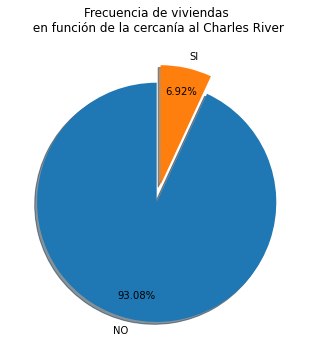

In [97]:
# cat_f_abs viene de las tablas de frecuencias
plt.figure(figsize=(5.5,5.5))
plt.pie(df_boston['CHAS'].value_counts(), labels=['NO', 'SI'], explode=(0,0.15), shadow=True, pctdistance=.8, startangle=90, autopct='%.2f%%')
plt.title('Frecuencia de viviendas\n en función de la cercanía al Charles River\n')
plt.show()

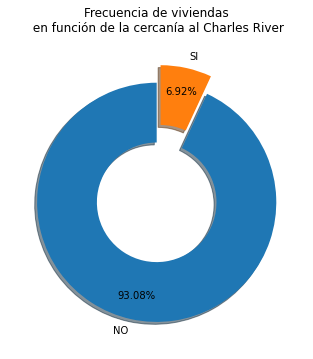

In [98]:
# cat_f_abs viene de las tablas de frecuencias
plt.figure(figsize=(5.5,5.5))
plt.pie(df_boston['CHAS'].value_counts(), labels=['NO', 'SI'], explode=(0,0.15), shadow=True, pctdistance=.8, startangle=90, 
       wedgeprops=dict(width=0.5),
       autopct='%.2f%%')
plt.title('Frecuencia de viviendas\n en función de la cercanía al Charles River\n')
plt.show()

### Gráfico  de bastones

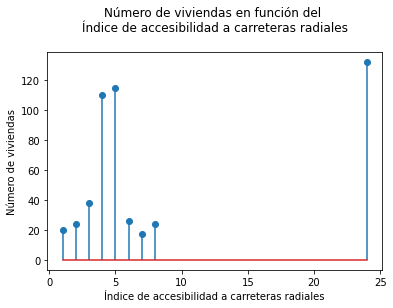

In [99]:
var_cat = 'RAD'                         # Variable categórica a graficar
frec_cat = df_boston[var_cat].value_counts()
plt.stem(np.array(frec_cat.index), np.array(frec_cat), use_line_collection=True, markerfmt=None)
plt.xlabel('Índice de accesibilidad a carreteras radiales'), plt.ylabel('Número de viviendas')
plt.title('Número de viviendas en función del \nÍndice de accesibilidad a carreteras radiales\n')
plt.show()

### Gráfico  de barras

**Con Matplotlib**

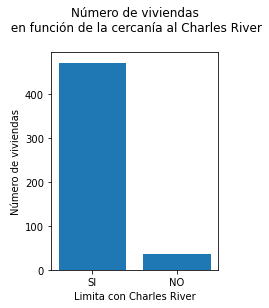

In [100]:
var_cat = 'CHAS'                         # Variable categórica a graficar
n_cat = df_boston[var_cat].nunique()
plt.figure(figsize=(n_cat*1.5,4))        # Definir un ancho de gráfico según el número de categorias de la variable
plt.bar(['SI','NO'], df_boston[var_cat].value_counts())
plt.xlabel('Limita con Charles River'), plt.ylabel('Número de viviendas')
plt.title('Número de viviendas\n en función de la cercanía al Charles River\n')
plt.show()

**Con Seaborn**

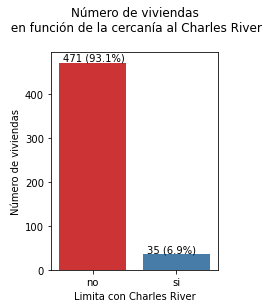

In [101]:
var_cat = 'CHAS'                         # Variable categórica a graficar
n_cat = df_boston[var_cat].nunique()
plt.figure(figsize=(n_cat*1.5,4))        # Definir un ancho de gráfico según el número de categorias de la variable
ax = sns.countplot(x=var_cat, data=df_boston, palette='Set1')
for p in ax.patches:
    ax.annotate('{:.0f} ({:.1f}%)'.format(p.get_height(), p.get_height()/len(df_boston)*100), (p.get_x()+0.05, p.get_height()+5))
ax.set_xticklabels(['no', 'si'], rotation=0, fontdict= {'horizontalalignment': 'center'})
plt.xlabel('Limita con Charles River'), plt.ylabel('Número de viviendas')
plt.title('Número de viviendas\n en función de la cercanía al Charles River\n')
plt.show()

### Histograma de Frecuencias

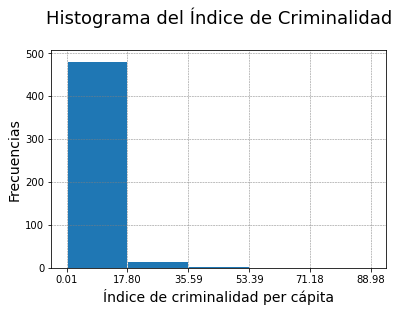

In [102]:
# El número de intervalos para un histograma se aconseja que sea un número entre 5 y 20, nunca menos de 5
var_sel = df_boston['CRIM']
n, b, _ = plt.hist(x=var_sel, bins=5, edgecolor='white',)# density=False, cumulative=False)
plt.xticks(b), plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Índice de criminalidad per cápita', fontdict={'fontsize': 14})
plt.ylabel('Frecuencias', fontdict={'fontsize': 14}),plt.title('Histograma del Índice de Criminalidad\n', fontdict={'fontsize': 18})
plt.show()

### Polígono de Frecuencias

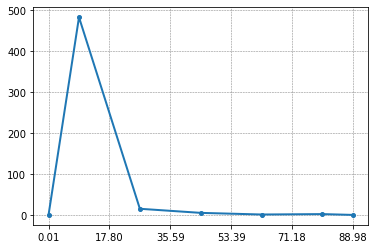

In [103]:
plt.plot([0]+list((b[:-1] + b[1:])/2)+list(b[-1:]), [0]+list(n)+[0], marker='.', linestyle='-', linewidth=2, markersize=8)
plt.xticks(b), plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

**Reglas para calcular el número de intervalos de un histograma (bins):**
- Comparación de las reglas principales: http://www1.frm.utn.edu.ar/estadistica/documentos/09NotaClase.pdf

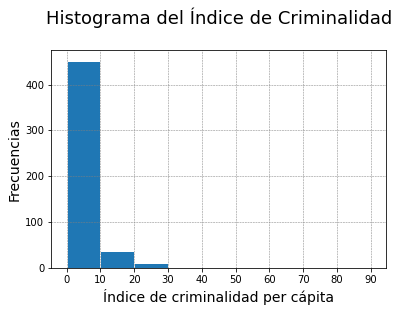

In [104]:
# Cálculo del número de intervalos: en base a la raíz cuadrada del número de observaciones
n_bins = int(math.sqrt(len(var_sel)))
# Regla de Sturges: para cálculo del número de intervalos
k = int(1 + math.log2(len(var_sel)))                  # Número de intervalos a considerar
a = int(round((var_sel.max() - var_sel.min())/k, 0))  # Amplitud del intervalo = rango/nro intervalos, (redondear siempre por exceso)
# El siguiente cálculo, garantiza que todos los valores queden dentro de los intervalos formados
if a*(k-1) <= var_sel.max():
    k += 1
    max_var = k*a
# De manera opcional, se puede calcular un entero minimo a partir de los valores, para ajustar el histograma
min_var = int(var_sel.min()) 
bin_edges = np.arange(min_var, max_var, a)
n, bins, batches = plt.hist(x=var_sel, bins=bin_edges, edgecolor='white', density=False, cumulative=False)
plt.xticks(bins), #plt.yticks(np.arange(0,500,50))
plt.xlabel('Índice de criminalidad per cápita', fontdict={'fontsize': 14}), plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.ylabel('Frecuencias', fontdict={'fontsize': 14}),plt.title('Histograma del Índice de Criminalidad\n', fontdict={'fontsize': 18})
plt.show()

In [105]:
n, bins, batches

(array([452.,  36.,  10.,   2.,   2.,   1.,   1.,   1.,   1.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

In [106]:
# A partir de los valores obtenidos del histograma se puede también obtener la Tabla de Frecuencias
# Intervalos: [LI,LS)
aux = {'LI': bins[:-1], 'LS': bins[1:], 'f_abs': n, 'f_abs_acum': np.cumsum(n),'f_rel': n/sum(n), 'f_rel_acum': np.cumsum(n/sum(n))}
pd.DataFrame(data=aux, index=np.arange(1, len(n)+1))

,LI,LS,f_abs,f_abs_acum,f_rel,f_rel_acum
1,0,10,452.0,452.0,0.893281,0.893281
2,10,20,36.0,488.0,0.071146,0.964427
3,20,30,10.0,498.0,0.019763,0.984190
4,30,40,2.0,500.0,0.003953,0.988142
5,40,50,2.0,502.0,0.003953,0.992095
6,50,60,1.0,503.0,0.001976,0.994071
7,60,70,1.0,504.0,0.001976,0.996047
8,70,80,1.0,505.0,0.001976,0.998024
9,80,90,1.0,506.0,0.001976,1.000000


**Sturges como parámetro:**

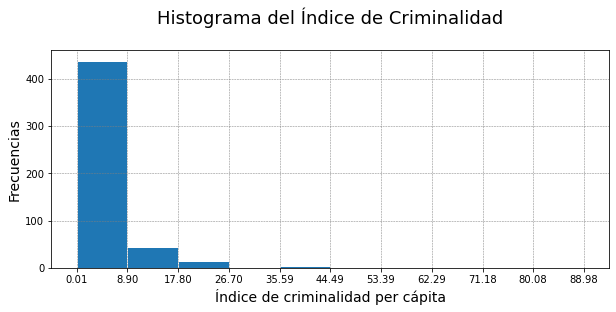

In [107]:
var_sel = df_boston['CRIM']
plt.figure(figsize=(10,4))
n, b, _ = plt.hist(x=var_sel, bins='sturges', edgecolor='white',)# density=False, cumulative=False)
plt.xticks(b), plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Índice de criminalidad per cápita', fontdict={'fontsize': 14})
plt.ylabel('Frecuencias', fontdict={'fontsize': 14}),plt.title('Histograma del Índice de Criminalidad\n', fontdict={'fontsize': 18})
plt.show()

### ECDF

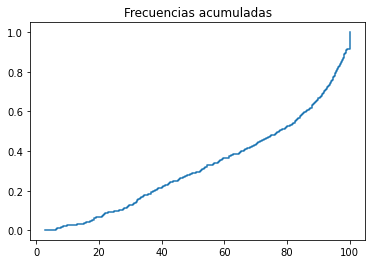

In [108]:
from statsmodels.distributions.empirical_distribution import ECDF
x = np.array(df_boston['AGE'])
cdf = ECDF(x)
x.sort()
F = cdf(x)
plt.step(x, F, where='post'), plt.title('Frecuencias acumuladas')
plt.show()

### Boxplot o Gráfico de Caja y bigotes

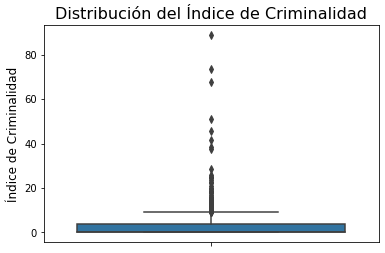

In [109]:
sns.boxplot(y='CRIM', data=df_boston)
plt.ylabel('Índice de Criminalidad', fontdict={'fontsize': 12})
plt.title('Distribución del Índice de Criminalidad', fontdict={'fontsize': 16})
plt.show()

### Swarm Plot, Beeswarm o Gráfico de Enjambre

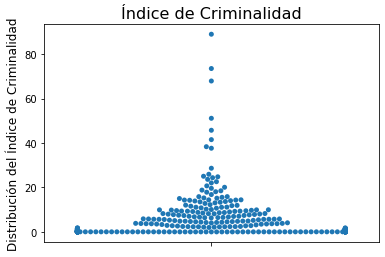

In [110]:
var_numer = 'CRIM'
sns.swarmplot(y=var_numer, data=df_boston)
plt.ylabel('Distribución del Índice de Criminalidad', fontdict={'fontsize': 12})
plt.title('Índice de Criminalidad', fontdict={'fontsize': 16})
plt.show()